# Chapter 4 - Classification

## 13. This question should be answered using the Weekly data set, 
which is part of the ISLP package.

Weekly percentage returns for the S&P 500 stock index between 1990 and 2010.

    Year: The year that the observation was recorded

    Lag1: Percentage return for previous week

    Lag2: Percentage return for 2 weeks previous

    Lag3: Percentage return for 3 weeks previous

    Lag4: Percentage return for 4 weeks previous

    Lag5: Percentage return for 5 weeks previous

    Volume: Volume of shares traded (average number of daily shares traded in billions)

    Today: Percentage return for this week

    Direction: A factor with levels ‘Down’ and ‘Up’ indicating whether the market had a positive or 
    negative return on a given week.

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read data

file = 'data/Weekly.csv'
weekly = pd.read_csv(file)
weekly.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


In [3]:
# General info

weekly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1089 entries, 0 to 1088
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       1089 non-null   int64  
 1   Lag1       1089 non-null   float64
 2   Lag2       1089 non-null   float64
 3   Lag3       1089 non-null   float64
 4   Lag4       1089 non-null   float64
 5   Lag5       1089 non-null   float64
 6   Volume     1089 non-null   float64
 7   Today      1089 non-null   float64
 8   Direction  1089 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 76.7+ KB


In [4]:
# Find the number of missing values in each column in this dataset.

weekly.isna().sum()

Year         0
Lag1         0
Lag2         0
Lag3         0
Lag4         0
Lag5         0
Volume       0
Today        0
Direction    0
dtype: int64

**(a) Produce some numerical and graphical summaries of the Weekly data. Do there appear to be any patterns?**

In [5]:
weekly.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,2000.048669,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899
std,6.033182,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927
min,1990.000000,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000
25%,1995.000000,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000
50%,2000.000000,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000
75%,2005.000000,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000
max,2010.000000,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000


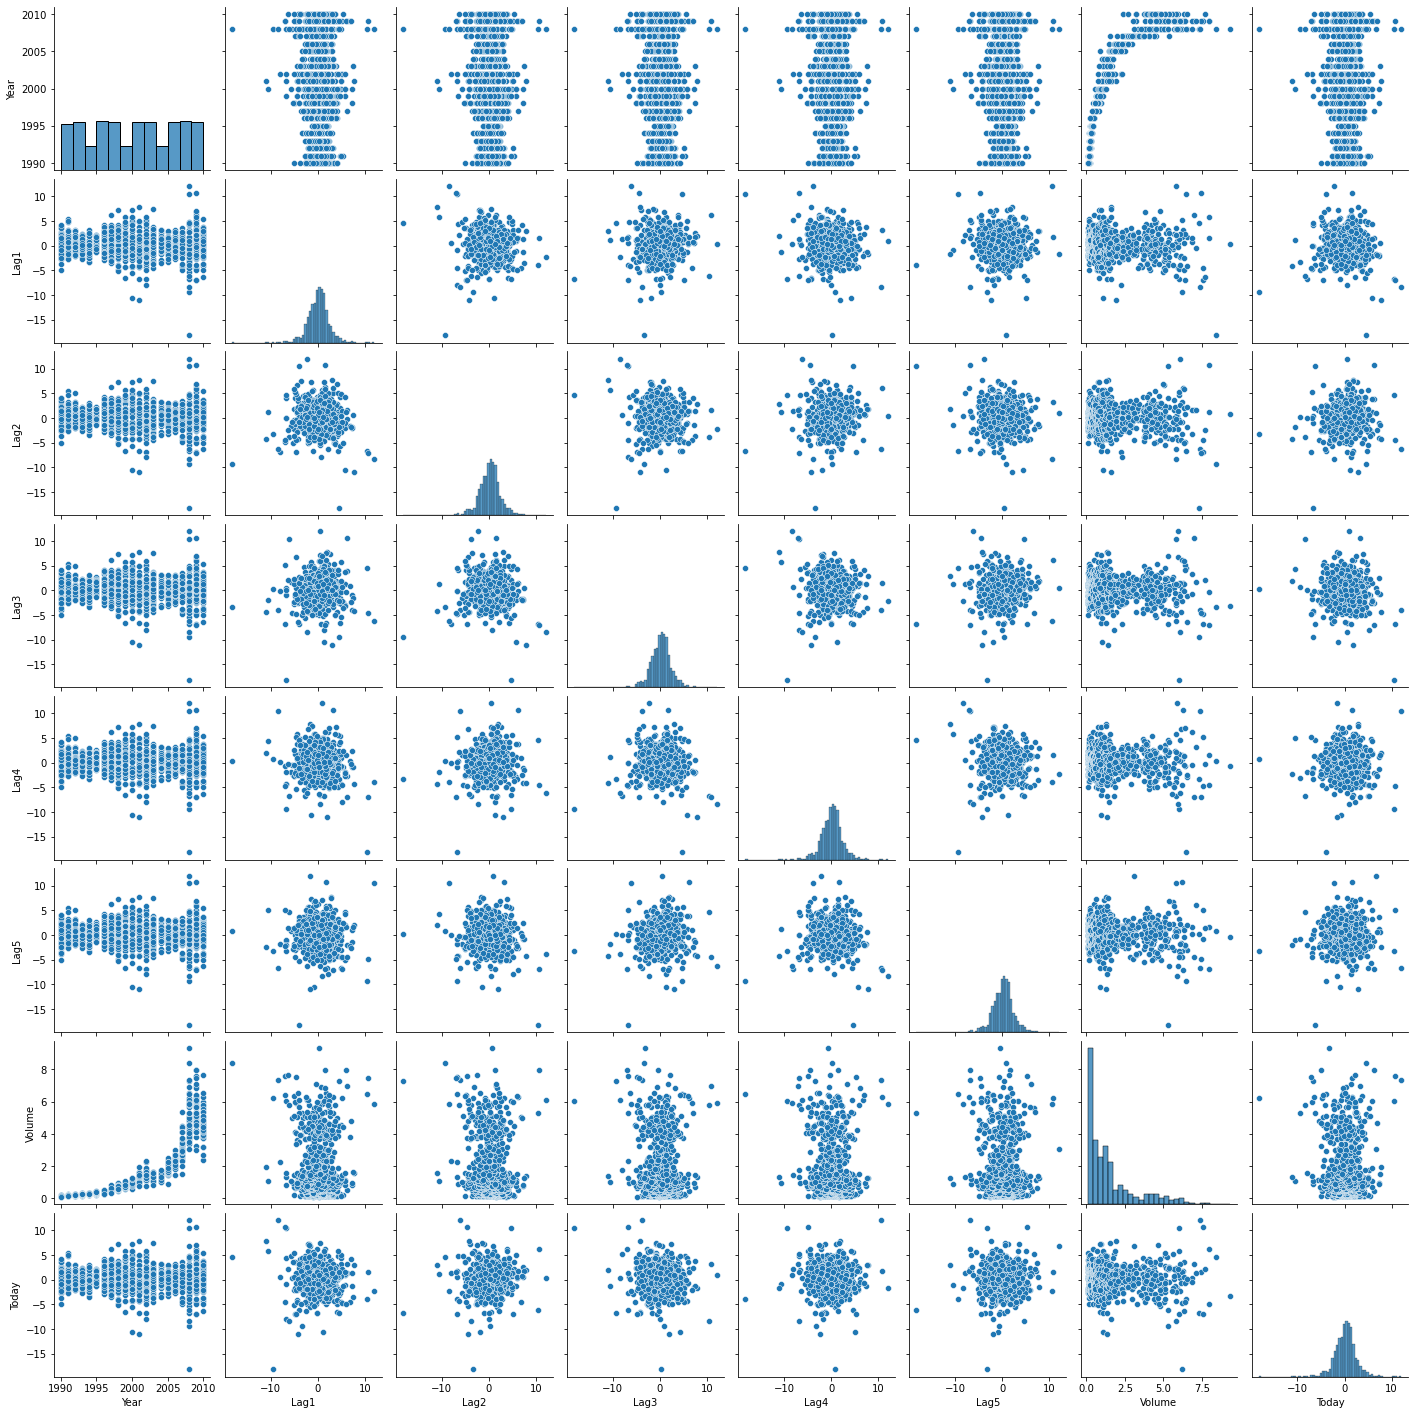

In [6]:
sns.pairplot(weekly)

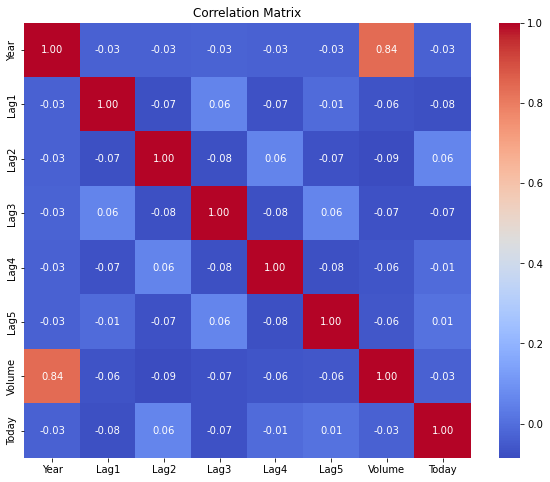

In [7]:
# Calculate the correlation matrix
corr_matrix = weekly.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

**(b) Use the full data set to perform a logistic regression with Direction as the response and the five lag variables plus Volume as predictors. Use the summary function to print the results. Do any of the predictors appear to be statistically significant? If so, which ones?**

In [8]:
# Prepare the predictors (X) and response (y) variables
X = weekly[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']]
y = pd.get_dummies(weekly['Direction'], drop_first=True)

# Add constant to the predictors
X = sm.add_constant(X)

# Fit logistic regression model
model = sm.Logit(y, X)
result = model.fit()

# Print summary of the logistic regression results
print(result.summary())

Optimization terminated successfully.
         Current function value: 1.925080
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                     Up   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Fri, 03 May 2024   Pseudo R-squ.:                     inf
Time:                        21:14:12   Log-Likelihood:                -2096.4
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.

    Lag1: Coefficient = -0.0413, p-value = 0.118 (not statistically significant).
    Lag2: Coefficient = 0.0584, p-value = 0.030 (statistically significant).
    Lag3: Coefficient = -0.0161, p-value = 0.547 (not statistically significant).
    Lag4: Coefficient = -0.0278, p-value = 0.294 (not statistically significant).
    Lag5: Coefficient = -0.0145, p-value = 0.583 (not statistically significant).
    Volume: Coefficient = -0.0227, p-value = 0.538 (not statistically significant).
    
Among the lag variables and the volume, only Lag2 appears to be statistically significant in predicting the direction of the market (Up or Down) at a significance level of 0.05.

**(c) Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix is telling you
about the types of mistakes made by logistic regression.**

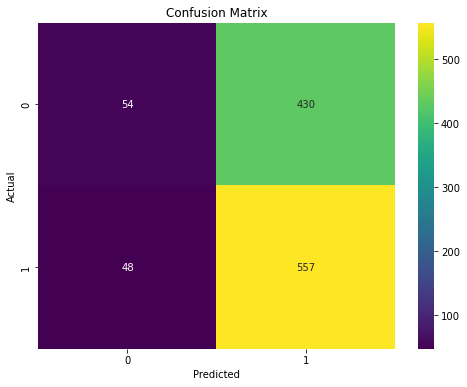


Overall Fraction of Correct Predictions: 0.56


In [9]:
# Make predictions using the fitted logistic regression model
predictions = result.predict(X)

# Convert predicted probabilities to binary predictions (0 or 1)
predicted_direction = (predictions > 0.5).astype(int)

# Compute the confusion matrix
confusion_matrix_df = pd.crosstab(y['Up'], predicted_direction, rownames=['Actual'], colnames=['Predicted'])
#print("Confusion Matrix:")
#print(confusion_matrix)

# Plot the confusion matrix with colors
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_df, annot=True, cmap='viridis', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Compute the overall fraction of correct predictions
correct_predictions = (y['Up'] == predicted_direction).mean()
print("\nOverall Fraction of Correct Predictions:", round(correct_predictions,2))

Explanation of the confusion matrix:

    
    True Negative (54)     False Positive (430)

    False Negative (48)    True Positive (557)


The confusion matrix helps us understand the types of mistakes made by the logistic regression model:

    Type I Error (False Positive): 430

    Type II Error (False Negative): 48

**(d) Now fit the logistic regression model using a training data period from 1990 to 2008, with Lag2 as the only predictor. Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from 2009 and 2010)**

In [10]:
# Filter the data for training period (1990 to 2008) and held-out data (2009 and 2010)
train_data = weekly[weekly['Year'] <= 2008]
test_data = weekly[weekly['Year'] > 2008]

# Prepare the predictors (Lag2) and response (Direction) variables for training and testing data
X_train = train_data[['Lag2']]
y_train = pd.get_dummies(train_data['Direction'], drop_first=True)
X_test = test_data[['Lag2']]
y_test = pd.get_dummies(test_data['Direction'], drop_first=True)

# Add constant to the predictors for training and testing data
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fit logistic regression model using Lag2 as the predictor
model = sm.Logit(y_train, X_train)
result = model.fit()

# Make predictions on the test data
predictions = result.predict(X_test)
predicted_direction = (predictions > 0.5).astype(int)

# Compute the confusion matrix and overall fraction of correct predictions for the held-out data
conf_matrix = confusion_matrix(y_test['Up'], predicted_direction)
correct_predictions = accuracy_score(y_test['Up'], predicted_direction)

# Print the confusion matrix and overall fraction of correct predictions
print("Confusion Matrix for held-out data (2009 and 2010):")
print(conf_matrix)
print()

# Select element
tn = conf_matrix[0][0]
fp = conf_matrix[0][1]
fn = conf_matrix[1][0]
tp = conf_matrix[1][1]

print("True Negative:", tn)
print("False Positive:", fp)
print("False Negative:", fn)
print("True Positive:", tp)
print("\nOverall Fraction of Correct Predictions:", correct_predictions)

Optimization terminated successfully.
         Current function value: 0.888927
         Iterations 4
Confusion Matrix for held-out data (2009 and 2010):
[[ 9 34]
 [ 5 56]]

True Negative: 9
False Positive: 34
False Negative: 5
True Positive: 56

Overall Fraction of Correct Predictions: 0.625


**(e) Repeat (d) using LDA.**

In [11]:
# Filter the data for training period (1990 to 2008) and held-out data (2009 and 2010)
train_data = weekly[weekly['Year'] <= 2008]
test_data = weekly[weekly['Year'] > 2008]

# Prepare the predictors (Lag2) and response (Direction) variables for training and testing data
X_train = train_data[['Lag2']]
y_train = train_data['Direction']
X_test = test_data[['Lag2']]
y_test = test_data['Direction']

# Fit LDA model using Lag2 as the predictor
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Make predictions on the test data
predictions = lda.predict(X_test)

# Compute the confusion matrix and overall fraction of correct predictions for the held-out data
conf_matrix = confusion_matrix(y_test, predictions)
correct_predictions = accuracy_score(y_test, predictions)

# Print the confusion matrix and overall fraction of correct predictions
print("Confusion Matrix for held-out data (2009 and 2010):")
print(conf_matrix)
print()

# Select element
tn = conf_matrix[0][0]
fp = conf_matrix[0][1]
fn = conf_matrix[1][0]
tp = conf_matrix[1][1]

print("True Negative:", tn)
print("False Positive:", fp)
print("False Negative:", fn)
print("True Positive:", tp)
print("\nOverall Fraction of Correct Predictions:", correct_predictions)

Confusion Matrix for held-out data (2009 and 2010):
[[ 9 34]
 [ 5 56]]

True Negative: 9
False Positive: 34
False Negative: 5
True Positive: 56

Overall Fraction of Correct Predictions: 0.625


**(f) Repeat (d) using QDA.**

In [12]:
# Filter the data for training period (1990 to 2008) and held-out data (2009 and 2010)
train_data = weekly[weekly['Year'] <= 2008]
test_data = weekly[weekly['Year'] > 2008]

# Prepare the predictors (Lag2) and response (Direction) variables for training and testing data
X_train = train_data[['Lag2']]
y_train = train_data['Direction']
X_test = test_data[['Lag2']]
y_test = test_data['Direction']

# Fit QDA model using Lag2 as the predictor
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

# Make predictions on the test data
predictions = qda.predict(X_test)

# Compute the confusion matrix and overall fraction of correct predictions for the held-out data
conf_matrix = confusion_matrix(y_test, predictions)
correct_predictions = accuracy_score(y_test, predictions)

# Print the confusion matrix and overall fraction of correct predictions
print("Confusion Matrix for held-out data (2009 and 2010):")
print(conf_matrix)
print()

# Select element
tn = conf_matrix[0][0]
fp = conf_matrix[0][1]
fn = conf_matrix[1][0]
tp = conf_matrix[1][1]

print("True Negative:", tn)
print("False Positive:", fp)
print("False Negative:", fn)
print("True Positive:", tp)
print("\nOverall Fraction of Correct Predictions:", correct_predictions)

Confusion Matrix for held-out data (2009 and 2010):
[[ 0 43]
 [ 0 61]]

True Negative: 0
False Positive: 43
False Negative: 0
True Positive: 61

Overall Fraction of Correct Predictions: 0.5865384615384616


**(g) Repeat (d) using KNN with K = 1.**

In [13]:
# Filter the data for training period (1990 to 2008) and held-out data (2009 and 2010)
train_data = weekly[weekly['Year'] <= 2008]
test_data = weekly[weekly['Year'] > 2008]

# Prepare the predictors (Lag2) and response (Direction) variables for training and testing data
X_train = train_data[['Lag2']]
y_train = train_data['Direction']
X_test = test_data[['Lag2']]
y_test = test_data['Direction']

# Fit KNN model with K=1 using Lag2 as the predictor
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

# Make predictions on the test data
predictions = knn.predict(X_test)

# Compute the confusion matrix and overall fraction of correct predictions for the held-out data
conf_matrix = confusion_matrix(y_test, predictions)
correct_predictions = accuracy_score(y_test, predictions)

# Print the confusion matrix and overall fraction of correct predictions
print("Confusion Matrix for held-out data (2009 and 2010):")
print(conf_matrix)
print()

# Select element
tn = conf_matrix[0][0]
fp = conf_matrix[0][1]
fn = conf_matrix[1][0]
tp = conf_matrix[1][1]

print("True Negative:", tn)
print("False Positive:", fp)
print("False Negative:", fn)
print("True Positive:", tp)
print("\nOverall Fraction of Correct Predictions:", correct_predictions)

Confusion Matrix for held-out data (2009 and 2010):
[[22 21]
 [30 31]]

True Negative: 22
False Positive: 21
False Negative: 30
True Positive: 31

Overall Fraction of Correct Predictions: 0.5096153846153846


**(h) Repeat (d) using naive Bayes.**

In [14]:
# Filter the data for training period (1990 to 2008) and held-out data (2009 and 2010)
train_data = weekly[weekly['Year'] <= 2008]
test_data = weekly[weekly['Year'] > 2008]

# Prepare the predictors (Lag2) and response (Direction) variables for training and testing data
X_train = train_data[['Lag2']]
y_train = train_data['Direction']
X_test = test_data[['Lag2']]
y_test = test_data['Direction']

# Fit Naive Bayes model using Lag2 as the predictor
nb = GaussianNB()
nb.fit(X_train, y_train)

# Make predictions on the test data
predictions = nb.predict(X_test)

# Compute the confusion matrix and overall fraction of correct predictions for the held-out data
conf_matrix = confusion_matrix(y_test, predictions)
correct_predictions = accuracy_score(y_test, predictions)

# Print the confusion matrix and overall fraction of correct predictions
print("Confusion Matrix for held-out data (2009 and 2010):")
print(conf_matrix)
print()

# Select element
tn = conf_matrix[0][0]
fp = conf_matrix[0][1]
fn = conf_matrix[1][0]
tp = conf_matrix[1][1]

print("True Negative:", tn)
print("False Positive:", fp)
print("False Negative:", fn)
print("True Positive:", tp)
print("\nOverall Fraction of Correct Predictions:", correct_predictions)

Confusion Matrix for held-out data (2009 and 2010):
[[ 0 43]
 [ 0 61]]

True Negative: 0
False Positive: 43
False Negative: 0
True Positive: 61

Overall Fraction of Correct Predictions: 0.5865384615384616


**(i) Which of these methods appears to provide the best results on
this data?**

Overall Fraction of Correct Predictions:

                             Logistic Regression: 0.625  <= both are
              Linear Discriminant Analysis (LDA): 0.625  <= best results
           Quadratic Discriminant Analysis (QDA): 0.587
    k-Nearest Neighbors (KNN) algorithm with k=1: 0.500
                                     Naive Bayes: 0.587

**(j) Experiment with different combinations of predictors, including possible transformations and interactions, for each of the
methods. Report the variables, method, and associated confusion matrix that appears to provide the best results on the held
out data. Note that you should also experiment with values for K in the KNN classifier.**

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, accuracy_score

In [16]:
# Check data types of each column in the DataFrame
for column in weekly.columns:
    data_type = weekly[column].dtype
    print(f"Column '{column}' has data type '{data_type}'.")

Column 'Year' has data type 'int64'.
Column 'Lag1' has data type 'float64'.
Column 'Lag2' has data type 'float64'.
Column 'Lag3' has data type 'float64'.
Column 'Lag4' has data type 'float64'.
Column 'Lag5' has data type 'float64'.
Column 'Volume' has data type 'float64'.
Column 'Today' has data type 'float64'.
Column 'Direction' has data type 'object'.


In [17]:
# Convert 'Direction' column to numerical values
weekly['Direction'] = weekly['Direction'].map({'Up': 1, 'Down': 0})

In [18]:
# IN THE FIRST PROGRAM, WHEN TRAINING THE MODEL, ONLY ONE PREDICTOR IS USED AT A TIME.


# Define the predictors and response variable
predictors = ['Lag2', 'Lag3', 'Lag4', 'Lag5']

# Define methods to experiment with
methods = {
    'Logistic Regression': sm.Logit,
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis,
    'Quadratic Discriminant Analysis': QuadraticDiscriminantAnalysis,
    'KNN': KNeighborsClassifier,
    'Naive Bayes': GaussianNB
}

best_model = None
best_accuracy = 0

for predictor in predictors:
    X = weekly[[predictor]]
    y = weekly['Direction']
    
    # Apply transformations if needed
    poly = PolynomialFeatures(degree=2)
    X_poly = poly.fit_transform(X)
    
    # Filter the data for training period (1990 to 2008) and held-out data (2009 and 2010)
    train_data = weekly[weekly['Year'] <= 2008]
    test_data = weekly[weekly['Year'] > 2008]
    X_train = train_data[[predictor]]
    y_train = train_data['Direction']
    X_test = test_data[[predictor]]
    y_test = test_data['Direction']
       
    for method_name, method_class in methods.items():
        if method_name == 'KNN':
            # Experiment with different values of K
            for k in range(1, 6):
                knn = method_class(n_neighbors=k)
                knn.fit(X_train, y_train)
                predictions = knn.predict(X_test)
                accuracy = accuracy_score(y_test, predictions)
                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_model = (method_name, predictor, k, confusion_matrix(y_test, predictions), accuracy)
        else:
            if method_name == 'Logistic Regression':
                model = method_class(y_train, X_train)  # Initialize Logit with endog and exog
                result = model.fit()  # Fit the model
            else:
                model = method_class()  
                result = model.fit(X_train, y_train)  # Fit the model
            
            predictions = result.predict(X_test)
            
            # Apply threshold to convert continuous predictions to binary categorical values
            binary_predictions = np.where(predictions >= 0.5, 1, 0)
            
            accuracy = accuracy_score(y_test, binary_predictions)
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_model = (method_name, predictor, confusion_matrix(y_test, binary_predictions), accuracy)

# Print the best-performing model and its associated confusion matrix
print("\nBest Model:")
print("Method:", best_model[0])
print("\nPredictor:", best_model[1])
if best_model[0] == 'KNN':
    print("K value:", best_model[2])
print("\nConfusion Matrix:")
print(best_model[2])  # Print confusion matrix
print("\nAccuracy:", best_model[3])  # Correctly accessing accuracy value

Optimization terminated successfully.
         Current function value: 0.690654
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.693060
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.693107
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.692664
         Iterations 3

Best Model:
Method: Linear Discriminant Analysis

Predictor: Lag2

Confusion Matrix:
[[ 9 34]
 [ 5 56]]

Accuracy: 0.625


In [19]:
# IN THE SECOND PROGRAM, ALL PREDICTORS ARE USED FOR BOTH TRAINING AND TESTING THE MODELS. 


# Define the predictors and response variable
predictors = ['Lag2', 'Lag3', 'Lag4', 'Lag5']  # Define different combinations of predictors to experiment with

# Define methods to experiment with
methods = {
    'Logistic Regression': sm.Logit,
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis,
    'Quadratic Discriminant Analysis': QuadraticDiscriminantAnalysis,
    'KNN': KNeighborsClassifier,
    'Naive Bayes': GaussianNB
}

best_model = None
best_accuracy = 0

for predictor in predictors:
    X = weekly[[predictor]]
    y = weekly['Direction']
    
    # Apply transformations if needed
    poly = PolynomialFeatures(degree=2)
    X_poly = poly.fit_transform(X)
    
    # Filter the data for training period (1990 to 2008) and held-out data (2009 and 2010)
    train_data = weekly[weekly['Year'] <= 2008]
    test_data = weekly[weekly['Year'] > 2008]
    X_train = train_data.drop(columns=['Direction'])
    y_train = train_data['Direction']
    X_test = test_data.drop(columns=['Direction'])
    y_test = test_data['Direction']
       
    for method_name, method_class in methods.items():
        if method_name == 'KNN':
            # Experiment with different values of K
            for k in range(1, 6):
                knn = method_class(n_neighbors=k)
                knn.fit(X_train, y_train)
                predictions = knn.predict(X_test)
                accuracy = accuracy_score(y_test, predictions)
                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_model = (method_name, predictor, k, confusion_matrix(y_test, predictions), accuracy)
        else:
            if method_name == 'Logistic Regression':
                model = method_class(y_train, X_train)  # Initialize Logit with endog and exog
                result = model.fit()  # Fit the model
            else:
                model = method_class()  
                result = model.fit(X_train, y_train)  # Fit the model
            
            predictions = result.predict(X_test)
            
            # Apply threshold to convert continuous predictions to binary categorical values
            binary_predictions = np.where(predictions >= 0.5, 1, 0)
            
            accuracy = accuracy_score(y_test, binary_predictions)
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_model = (method_name, predictor, confusion_matrix(y_test, binary_predictions), accuracy)

# Print the best-performing model and its associated confusion matrix
print("\nBest Model:")
print("Method:", best_model[0])
print("\nPredictor:", best_model[1])
if best_model[0] == 'KNN':
    print("K value:", best_model[2])
print("\nConfusion Matrix:")
print(best_model[2])  # Print confusion matrix
print("\nAccuracy:", best_model[3])  # Correctly accessing accuracy value

         Current function value: 0.000000
         Iterations: 35
         Current function value: 0.000000
         Iterations: 35
         Current function value: 0.000000
         Iterations: 35
         Current function value: 0.000000
         Iterations: 35

Best Model:
Method: Logistic Regression

Predictor: Lag2

Confusion Matrix:
[[43  0]
 [ 0 61]]

Accuracy: 1.0


In [20]:
# IN THE THIRD PROGRAM, THE SPECIFIC YEARS AS TRAINING WERE DISREGARDED 
# AND ALL PREDICTORS ARE USED FOR BOTH TRAINING AND TESTING THE MODELS. 


# Define the predictors and response variable
predictors = ['Lag2', 'Lag3', 'Lag4', 'Lag5']  # Define different combinations of predictors to experiment with

# Define methods to experiment with
methods = {
    'Logistic Regression': sm.Logit,
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis,
    'Quadratic Discriminant Analysis': QuadraticDiscriminantAnalysis,
    'KNN': KNeighborsClassifier,
    'Naive Bayes': GaussianNB
}

best_model = None
best_accuracy = 0

for predictor in predictors:
    X = weekly[[predictor]]
    y = weekly['Direction']
    
    # Apply transformations if needed
    poly = PolynomialFeatures(degree=2)
    X_poly = poly.fit_transform(X)
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)
       
    for method_name, method_class in methods.items():
        if method_name == 'KNN':
            # Experiment with different values of K
            for k in range(1, 6):
                knn = method_class(n_neighbors=k)
                knn.fit(X_train, y_train)
                predictions = knn.predict(X_test)
                accuracy = accuracy_score(y_test, predictions)
                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_model = (method_name, predictor, k, confusion_matrix(y_test, predictions), accuracy)
        else:
            if method_name == 'Logistic Regression':
                model = method_class(y_train, X_train)  # Initialize Logit with endog and exog
                result = model.fit()  # Fit the model
            else:
                model = method_class()  
                result = model.fit(X_train, y_train)  # Fit the model
            
            predictions = result.predict(X_test)
            
            # Apply threshold to convert continuous predictions to binary categorical values
            binary_predictions = np.where(predictions >= 0.5, 1, 0)
            
            accuracy = accuracy_score(y_test, binary_predictions)
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_model = (method_name, predictor, confusion_matrix(y_test, binary_predictions), accuracy)

# Print the best-performing model and its associated confusion matrix
print("\nBest Model:")
print("Method:", best_model[0])
print("\nPredictor:", best_model[1])
if best_model[0] == 'KNN':
    print("K value:", best_model[2])
print("\nConfusion Matrix:")
print(best_model[2])  # Print confusion matrix
print("\nAccuracy:", best_model[3])  # Correctly accessing accuracy value

Optimization terminated successfully.
         Current function value: 0.685519
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.689048
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.689152
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.689624
         Iterations 3

Best Model:
Method: Naive Bayes

Predictor: Lag4

Confusion Matrix:
[[  7  77]
 [  4 130]]

Accuracy: 0.6284403669724771


## 14. In this problem, you will develop a model to predict 
whether a given car gets high or low gas mileage based on the Auto data set.

In [21]:
# Read data

file = 'data/Auto.csv'
auto = pd.read_csv(file)
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [22]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


In [23]:
# Convert specific columns from object to float
auto['horsepower'] = auto['cylinders'].astype(float)

auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    float64
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.0+ KB


In [24]:
# Find the number of missing values in each column in this dataset.

auto.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

**(a) Create a binary variable, mpg01, that contains a 1 if mpg contains a value above its median, and a 0 if mpg contains a value below its median. You can compute the median using the median() method of the data frame. Note you may find it helpful to add a column mpg01 to the data frame by assignment. Assuming you have stored the data frame as Auto, this can be done as follows:**

    auto['mpg01'] = mpg01

In [25]:
# Calculate the median of the 'mpg' column
mpg_median = auto['mpg'].median()

# Create a new column 'mpg01' based on the median
auto['mpg01'] = (auto['mpg'] > mpg_median).astype(int)

print("mpg median",mpg_median)

mpg median 23.0


In [26]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
0,18.0,8,307.0,8.0,3504,12.0,70,1,chevrolet chevelle malibu,0
1,15.0,8,350.0,8.0,3693,11.5,70,1,buick skylark 320,0
2,18.0,8,318.0,8.0,3436,11.0,70,1,plymouth satellite,0
3,16.0,8,304.0,8.0,3433,12.0,70,1,amc rebel sst,0
4,17.0,8,302.0,8.0,3449,10.5,70,1,ford torino,0


**(b) Explore the data graphically in order to investigate the association between mpg01 and the other features. Which of the other features seem most likely to be useful in predicting mpg01? Scatterplots and boxplots may be useful tools to answer this question. Describe your findings.**

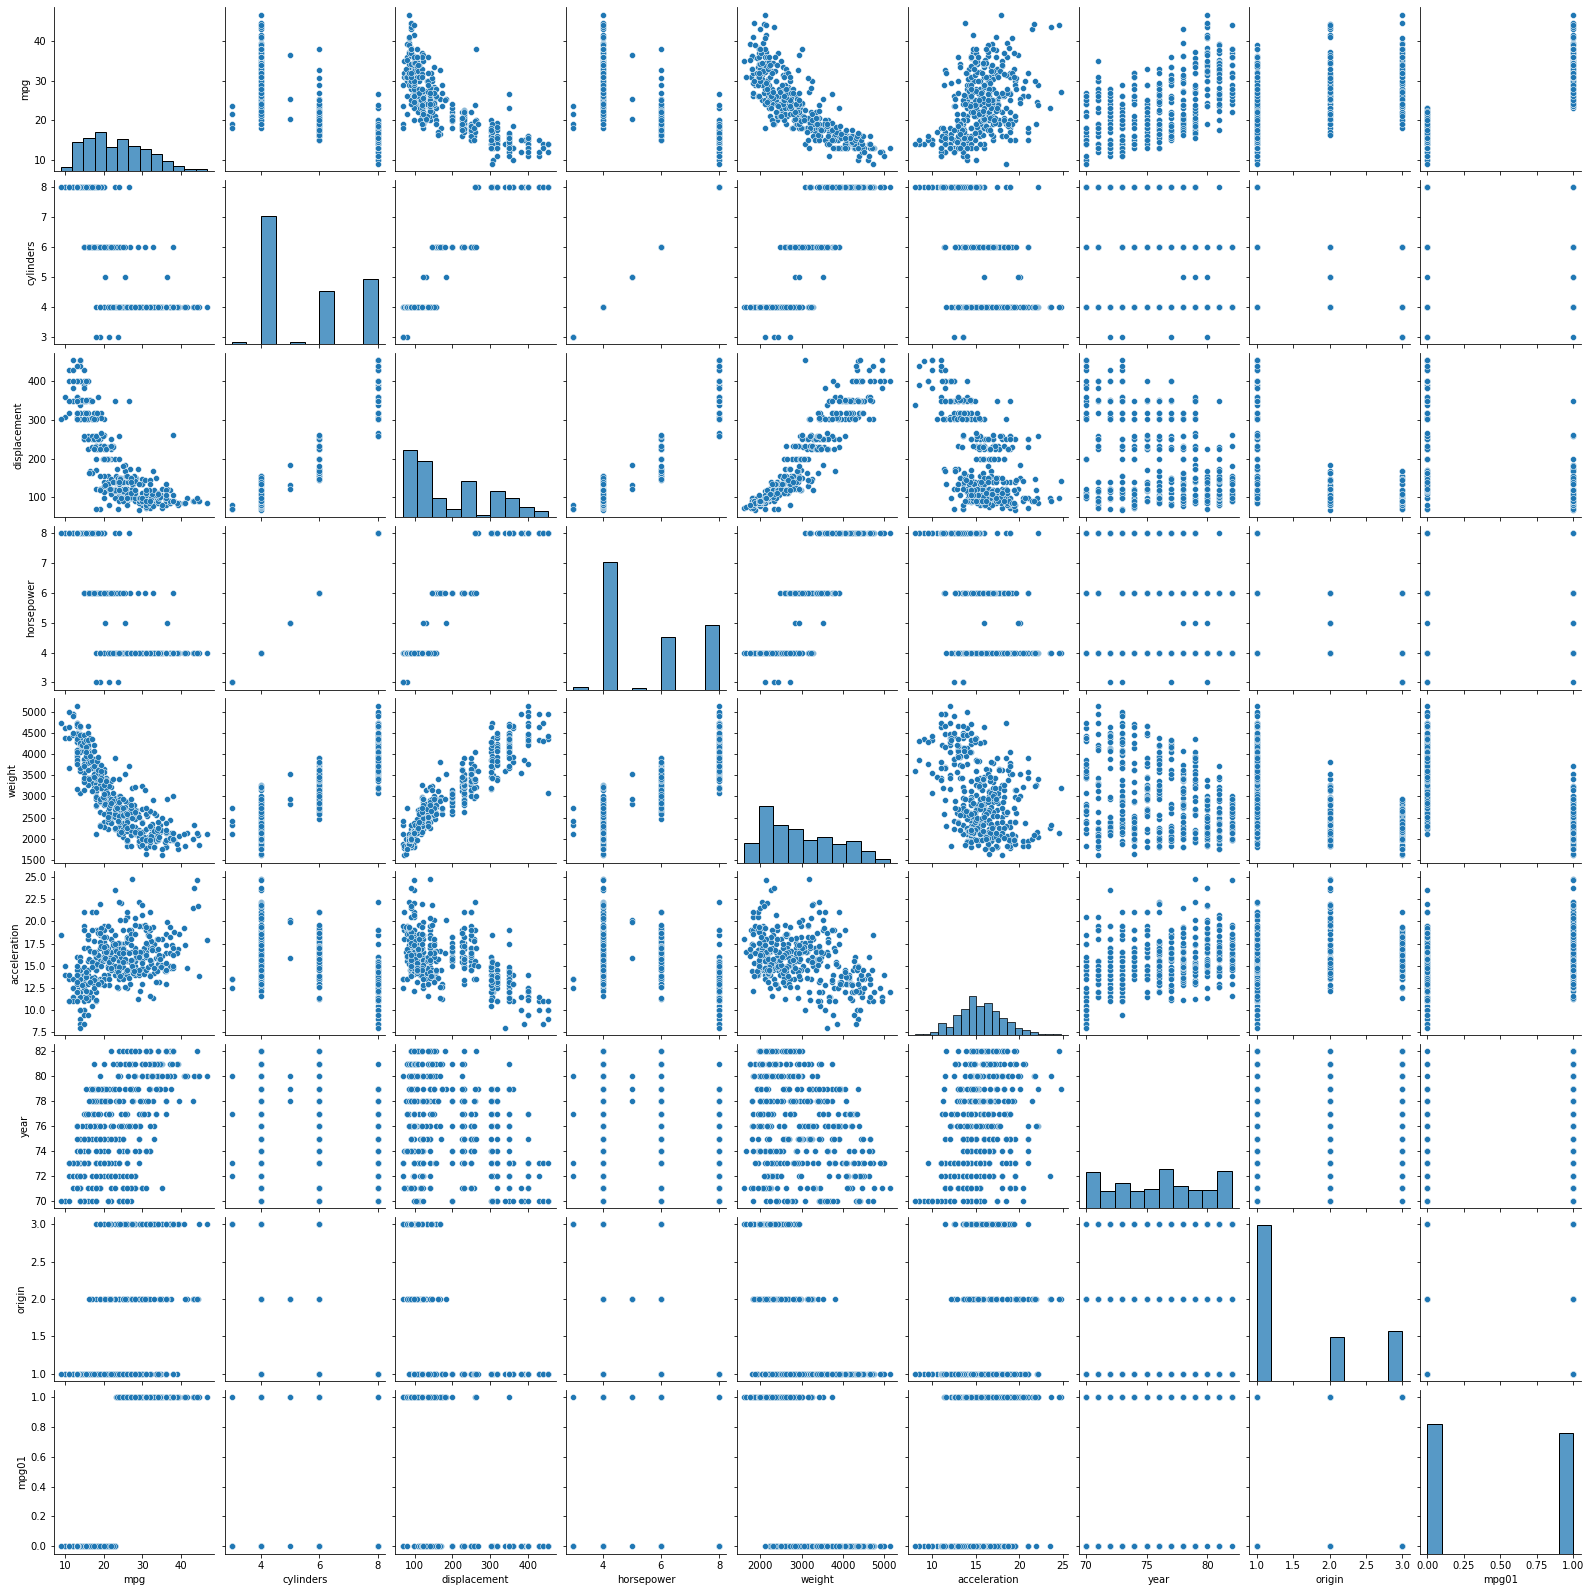

In [27]:
sns.pairplot(auto)

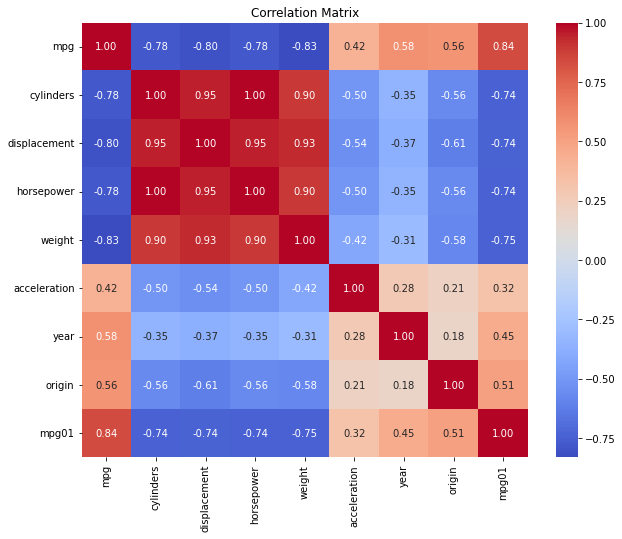

In [28]:
# Plot the correlation matrix as a heatmap

corr_matrix = auto.corr()

plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

<AxesSubplot:xlabel='mpg01', ylabel='weight'>

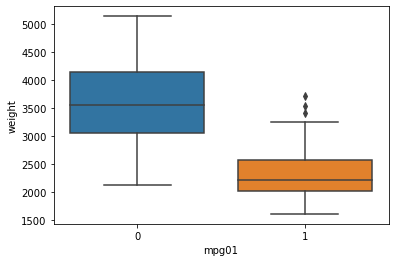

In [29]:
sns.boxplot(x = auto['mpg01'],y = auto['weight'])

<AxesSubplot:xlabel='mpg01', ylabel='displacement'>

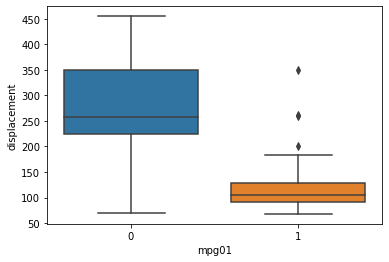

In [30]:
sns.boxplot(x = auto['mpg01'],y = auto['displacement'])

<AxesSubplot:xlabel='mpg01', ylabel='cylinders'>

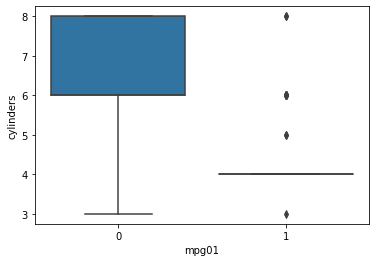

In [31]:
sns.boxplot(x = auto['mpg01'],y = auto['cylinders'])

**(c) Split the data into a training set and a test set**

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
# Define the features (X) and the target variable (y)
X = auto[['cylinders','displacement','weight','horsepower']]
y = auto['mpg01']  # Target variable ('mpg01' column)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and test sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (317, 4)
Shape of X_test: (80, 4)
Shape of y_train: (317,)
Shape of y_test: (80,)


In [34]:
X_train.head()

,cylinders,displacement,weight,horsepower
262,8,305.0,3425,8.0
113,6,155.0,2472,6.0
176,6,232.0,3211,6.0
63,8,400.0,4385,8.0
245,4,98.0,1800,4.0


In [35]:
y_train.head()

262    0
113    0
176    0
63     0
245    1
Name: mpg01, dtype: int32

**(d) Perform LDA on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in
(b). What is the test error of the model obtained?**

In [36]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

In [37]:
# Initialize and fit the LDA model
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)

# Predict mpg01 values for the test set
predictions_lda = lda_model.predict(X_test)

# Calculate test error
test_error_lda = 1 - accuracy_score(y_test, predictions_lda)
print("Test Error LDA:", test_error_lda)

Test Error LDA: 0.16249999999999998


**(e) Perform QDA on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in
(b). What is the test error of the model obtained?**

In [38]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

In [39]:
# Initialize and fit the QDA model
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

# Make predictions on the test data
predictions_qda = qda.predict(X_test)

# Calculate the test error
test_error_qda = 1 - accuracy_score(y_test, predictions_qda)
print("Test Error QDA:", test_error_qda)

Test Error QDA: 0.15000000000000002


In [40]:
# First 10 elements of numpy array
predictions_qda[:10]

array([1, 1, 1, 1, 0, 1, 0, 0, 0, 1])

**(f) Perform logistic regression on the training data in order to predict mpg01 using the variables that seemed most associated with
mpg01 in (b). What is the test error of the model obtained?**

In [41]:
from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import accuracy_score

In [42]:
# Initialize and fit the LReg model
lreg = LogisticRegression()
lreg.fit(X_train, y_train)

# Make predictions on the test data
predictions_lreg = lreg.predict(X_test)

# Calculate the test error
test_error_lreg = 1 - accuracy_score(y_test, predictions_lreg)
print("Test Error LReg:", test_error_lreg)

Test Error LReg: 0.16249999999999998


In [43]:
# First 10 elements of numpy array
predictions_lreg[:10]

array([1, 1, 1, 1, 0, 1, 0, 0, 0, 1])

In [44]:
# Just checking if predictions in these models are equal
print(np.array_equal(predictions_qda, predictions_lreg))

False


**(g) Perform naive Bayes on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?**

In [45]:
from sklearn.naive_bayes import GaussianNB
#from sklearn.metrics import accuracy_score

In [46]:
# Initialize and fit the naive Bayes model
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

# Make predictions on the test data
predictions_nb = naive_bayes.predict(X_test)

# Calculate the test error
test_error_nb = 1 - accuracy_score(y_test, predictions_nb)
print("Test Error:", test_error_nb)

Test Error: 0.15000000000000002


In [47]:
# LDA
test_error_lda = 1 - accuracy_score(y_test, predictions_lda)
print("Test Error LDA:", round(test_error_lda,4))

# QDA
test_error_qda = 1 - accuracy_score(y_test, predictions_qda)
print("Test Error QDA:", round(test_error_qda,4))

# LReg
test_error_lreg = 1 - accuracy_score(y_test, predictions_lreg)
print("Test Error LReg:", round(test_error_lreg,4))

# NB
test_error_nb = 1 - accuracy_score(y_test, predictions_nb)
print("Test Error NB:", round(test_error_nb,4))

Test Error LDA: 0.1625
Test Error QDA: 0.15
Test Error LReg: 0.1625
Test Error NB: 0.15


In [48]:
# Just checking if predictions in these models are equal
print(np.array_equal(predictions_lda, predictions_lreg))

False


In [49]:
# Just checking if predictions in these models are equal
print(np.array_equal(predictions_qda, predictions_nb))

False


**(h) Perform KNN on the training data, with several values of K, in order to predict mpg01. Use only the variables that seemed most associated with mpg01 in (b). What test errors do you obtain? Which value of K seems to perform the best on this data set?**

In [50]:
# Initialize variables to store best K and its associated test error
best_k = None
best_test_error = float('inf')

# Define a range of K values to experiment with
k_values = range(1, 21)

# Iterate over each value of K
for k in k_values:
    # Initialize and fit the KNN model
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Make predictions on the test data
    predictions = knn.predict(X_test)
    
    # Calculate the test error
    test_error = 1 - accuracy_score(y_test, predictions)
    
    # Print the test error for the current value of K
    print("K =", k, "Test Error:", test_error)
    
    # Update the best K and test error if the current K has lower test error
    if test_error < best_test_error:
        best_k = k
        best_test_error = test_error

# Print the best performing value of K and its associated test error
print()
print("Best K:", best_k)
print("Best Test Error:", best_test_error)

K = 1 Test Error: 0.13749999999999996
K = 2 Test Error: 0.13749999999999996
K = 3 Test Error: 0.13749999999999996
K = 4 Test Error: 0.15000000000000002
K = 5 Test Error: 0.125
K = 6 Test Error: 0.15000000000000002
K = 7 Test Error: 0.15000000000000002
K = 8 Test Error: 0.16249999999999998
K = 9 Test Error: 0.15000000000000002
K = 10 Test Error: 0.16249999999999998
K = 11 Test Error: 0.16249999999999998
K = 12 Test Error: 0.15000000000000002
K = 13 Test Error: 0.17500000000000004
K = 14 Test Error: 0.16249999999999998
K = 15 Test Error: 0.16249999999999998
K = 16 Test Error: 0.13749999999999996
K = 17 Test Error: 0.13749999999999996
K = 18 Test Error: 0.15000000000000002
K = 19 Test Error: 0.15000000000000002
K = 20 Test Error: 0.15000000000000002

Best K: 5
Best Test Error: 0.125


## 15. This problem involves writing functions.

**(a) Write a function, Power(), that prints out the result of raising 2 to the 3rd power. In other words, your function should compute 23 and print out the results. Hint: Recall that x^a raises x to the power a. Use the print() function to display the result.**

In [51]:
def Power():
    result = 2 ** 3
    print("2 raised to the power of 3 is:",result)

# Call the Power function
Power()

2 raised to the power of 3 is: 8


**(b) Create a new function, Power2(), that allows you to pass any two numbers, x and a, and prints out the value of x^a. You should be able to call your function by entering, for instance, Power2(3, 8) on the command line. This should output the value of 38, namely, 6,561.**

In [52]:
def Power2(a,b):
    result = a ** b
    print(f"{a} raised to the power of {b} is: {result}")

# Call the Power function
Power2(3,8)

3 raised to the power of 8 is: 6561


**(c) Using the Power2() function that you just wrote, compute 10^3, 8^17, and 131^3.**

In [53]:
Power2(10,3)
print()
Power2(8,17)
print()
Power2(131,3)

10 raised to the power of 3 is: 1000

8 raised to the power of 17 is: 2251799813685248

131 raised to the power of 3 is: 2248091


**(d) Now create a new function, Power3(), that actually returns the result x^a as a Python object, rather than simply printing it to the screen. That is, if you store the value x^a in an object called result within your function, then you can simply return this result, using the following line: 'return result'. Note that the line above should be the last line in your function, and it should be indented 4 spaces.**

In [54]:
def Power3(x, a):
    result = x ** a
    return result

# Call the Power3 function and store the result
result = Power3(2, 3)

# Print the result
print(result)

8


**(e) Now using the Power3() function, create a plot of f(x) = x2. The x-axis should display a range of integers from 1 to 10, and the y-axis should display x2. Label the axes appropriately, and use an appropriate title for the figure. Consider displaying either the x-axis, the y-axis, or both on the log-scale. You can do this by using the ax.set_xscale() and ax.set_yscale() methods of the axes you are plotting to.**

In [55]:
import matplotlib.pyplot as plt

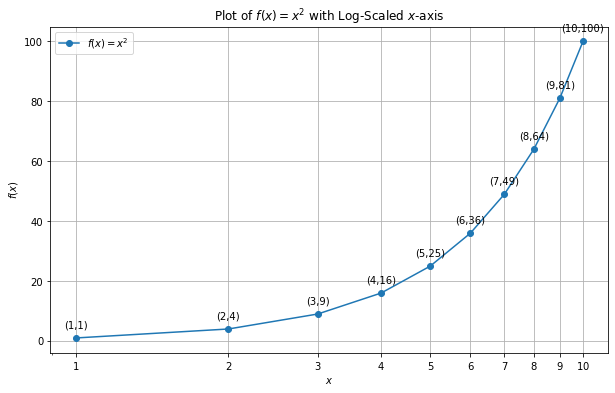

In [56]:
# Define the Power3 function
def Power3(x, a):
    result = x ** a
    return result

# Generate x values from 1 to 10
x_values = range(1, 11)

# Calculate y values using Power3 function (x^2)
y_values = [Power3(x, 2) for x in x_values]

# Create a new figure with larger size
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the width and height as needed

# Plot the function
ax.plot(x_values, y_values, marker='o', linestyle='-', label='$f(x) = x^2$')

# Annotate each point with its y-value
for x, y in zip(x_values, y_values):
    ax.annotate(f"({x},{y})", (x, y), textcoords="offset points", xytext=(0,10), ha='center')

# Set the x-axis to log scale
ax.set_xscale('log')

# Define custom tick locations and labels for the x-axis
ax.set_xticks(x_values)
ax.set_xticklabels([f"${x}$" for x in x_values])  # Use LaTeX for formatting

# Label the axes and title
ax.set_xlabel('$x$')
ax.set_ylabel('$f(x)$')
ax.set_title('Plot of $f(x) = x^2$ with Log-Scaled $x$-axis')

# Add legend
ax.legend()

# Display the plot
plt.grid(True)
plt.show()

**(f) Create a function, PlotPower(), that allows you to create a plot of x against x^a for a fixed a and a sequence of values of x. For instance, if you call 'PlotPower(np.arange(1, 11), 3)' then a plot should be created with an x-axis taking on values
1, 2, . . . , 10, and a y-axis taking on values 13, 23, . . . , 103.**

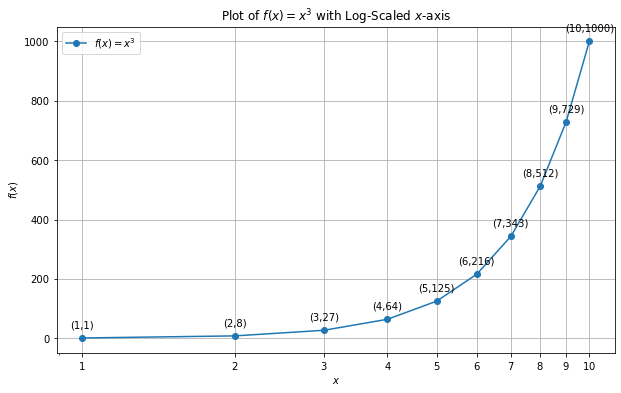

In [57]:
def PlotPower(x_values, a):
    y_values = x_values ** a
    
    # Create a new figure with larger size
    fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the width and height as needed

    # Plot the function
    ax.plot(x_values, y_values, marker='o', linestyle='-', label=f'$f(x) = x^{{{a}}}$')

    # Annotate each point with its y-value
    for x, y in zip(x_values, y_values):
        ax.annotate(f"({x},{y})", (x, y), textcoords="offset points", xytext=(0,10), ha='center')

    # Set the x-axis to log scale
    ax.set_xscale('log')

    # Define custom tick locations and labels for the x-axis
    ax.set_xticks(x_values)
    ax.set_xticklabels([f"${x}$" for x in x_values])  # Use LaTeX for formatting

    # Label the axes and title
    ax.set_xlabel('$x$')
    ax.set_ylabel('$f(x)$')
    ax.set_title(f'Plot of $f(x) = x^{{{a}}}$ with Log-Scaled $x$-axis')

    # Add legend
    ax.legend()

    # Display the plot
    plt.grid(True)
    plt.show()

# Example usage
PlotPower(np.arange(1, 11), 3)

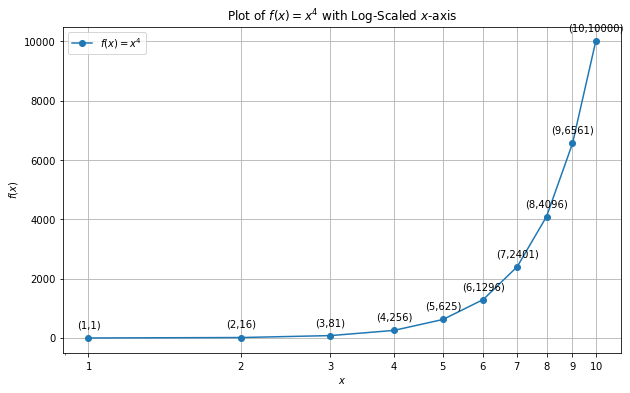

In [58]:
# Example usage
PlotPower(np.arange(1, 11), 4)

## 16. Using the Boston data set, 

**fit classification models in order to predict whether a given suburb has a crime rate above or below the median. Explore logistic regression, LDA, naive Bayes, and KNN models using various subsets of the predictors. Describe your findings. Hint: You will have to create the response variable yourself, using the variables that are contained in the Boston data set.**

The following describes the dataset columns:

    CRIM - per capita crime rate by town
    ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
    INDUS - proportion of non-retail business acres per town.
    CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
    NOX - nitric oxides concentration (parts per 10 million)
    RM - average number of rooms per dwelling
    AGE - proportion of owner-occupied units built prior to 1940
    DIS - weighted distances to five Boston employment centres
    RAD - index of accessibility to radial highways
    TAX - full-value property-tax rate per \$10,000
    PTRATIO - pupil-teacher ratio by town
    B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    LSTAT - % lower status of the population
    MEDV - Median value of owner-occupied homes in $1000's

In [59]:
# Read data
file = 'data/Boston.csv'
boston = pd.read_csv(file)
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [60]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [61]:
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


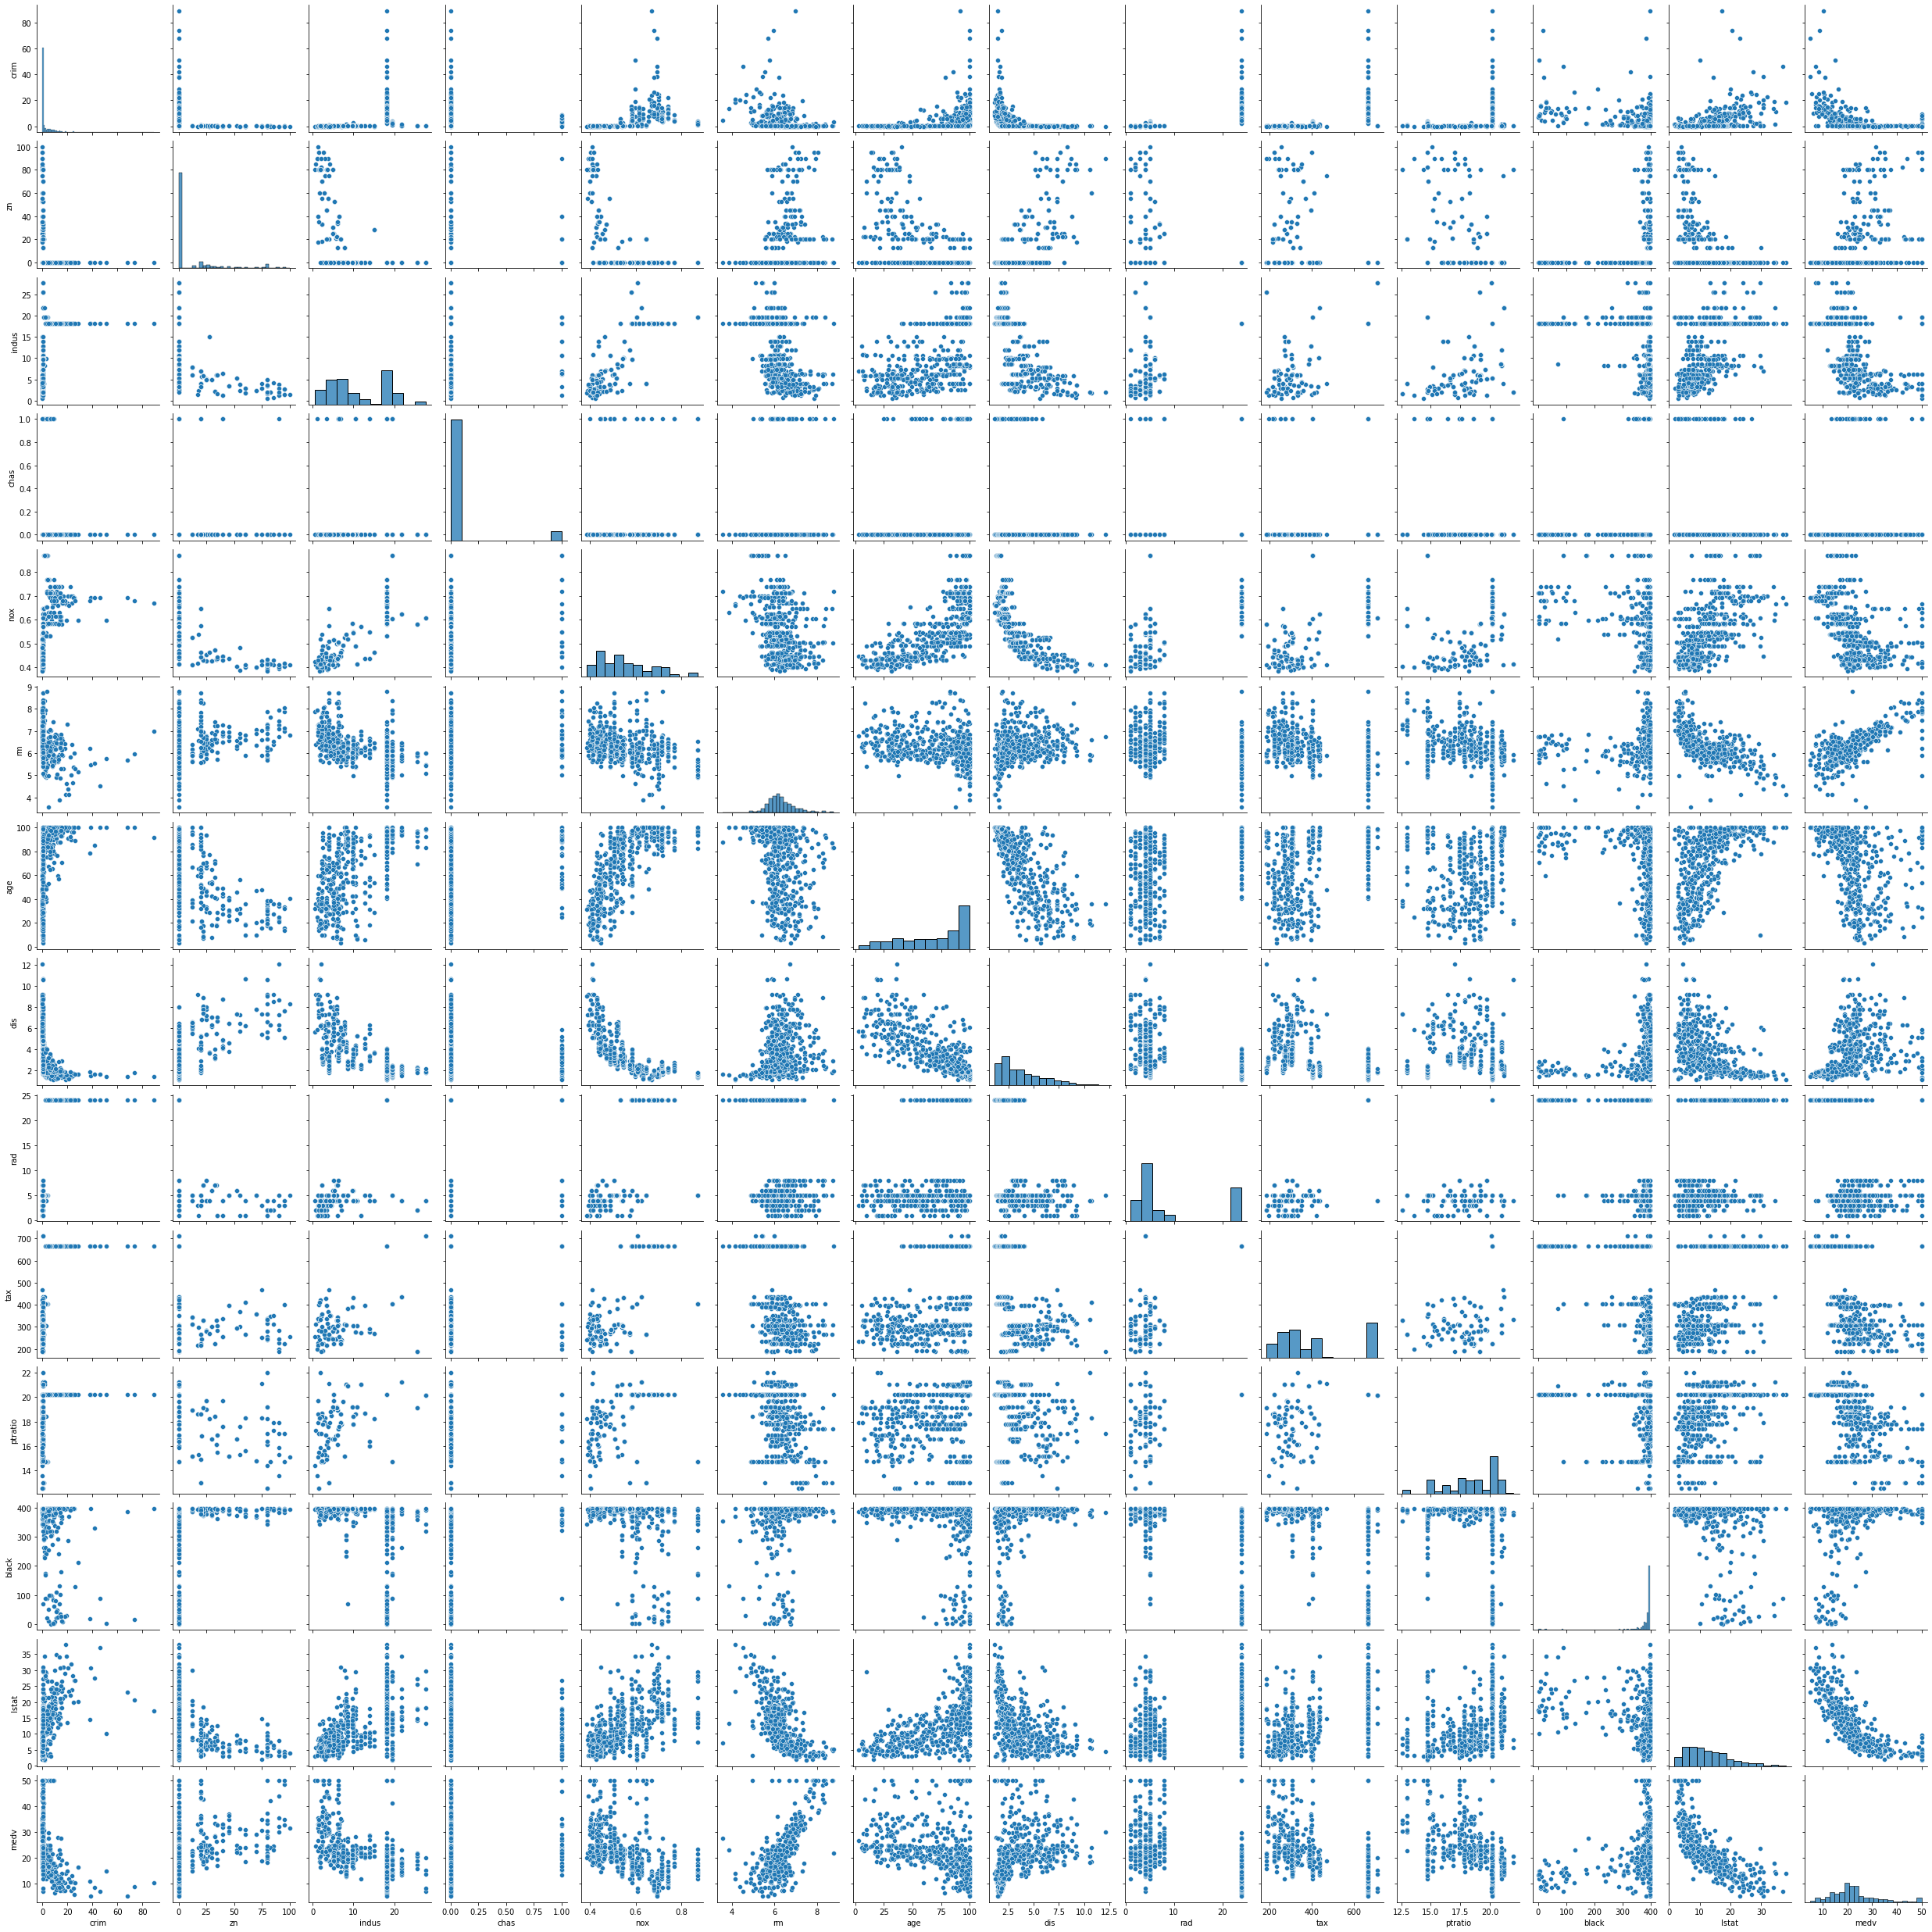

In [62]:
sns.pairplot(boston)

In [63]:
# Print the number of null values for each column
print(boston.isnull().sum())

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64


In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

In [65]:
# Step 1: Split the Boston dataset
X = boston['crim']
y = boston.drop(columns=['crim'])

# Step 2: Create the response variable indicating whether the crime rate is above or below the median
crime_median = np.median(X)
y_binary = (X > crime_median).astype(int)

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X.values.reshape(-1, 1), y_binary, test_size=0.2, random_state=42)

# Step 4: Fit classification models
models = {
    'Logistic Regression': LogisticRegression(solver='liblinear'),
    'LDA': LinearDiscriminantAnalysis(),
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier()
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model: {model_name}")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy}\n")

Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        52
           1       1.00      0.84      0.91        50

    accuracy                           0.92       102
   macro avg       0.93      0.92      0.92       102
weighted avg       0.93      0.92      0.92       102

Accuracy: 0.9215686274509803

Model: LDA
              precision    recall  f1-score   support

           0       0.73      1.00      0.85        52
           1       1.00      0.62      0.77        50

    accuracy                           0.81       102
   macro avg       0.87      0.81      0.81       102
weighted avg       0.86      0.81      0.81       102

Accuracy: 0.8137254901960784

Model: Naive Bayes
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        52
           1       1.00      0.90      0.95        50

    accuracy                           0.95       102
   macro av

**Let's check this KNN model:**

In [66]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

In [67]:
# Step 1: Split the Boston dataset
X = boston['crim']
y = boston.drop(columns=['crim'])

# Step 2: Create the response variable indicating whether the crime rate is above or below the median
crime_median = np.median(X)
y_binary = (X > crime_median).astype(int)

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X.values.reshape(-1, 1), y_binary, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize KNN classifier
knn = KNeighborsClassifier()

# Evaluate KNN model using cross-validation
cv_scores = cross_val_score(knn, X_train_scaled, y_train, cv=5)

print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))

# Train the KNN model
knn.fit(X_train_scaled, y_train)

# Predictions on the test set
y_pred = knn.predict(X_test_scaled)

# Model evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualize decision boundaries (for 2D data only)
if X_train.shape[1] == 2:
    plot_decision_regions(X_train_scaled, y_train, clf=knn)
    plt.xlabel('CRIM')
    plt.ylabel('Binary Response')
    plt.title('Decision Boundaries of KNN Classifier')
    plt.show()

Cross-validation scores: [1.         0.98765432 0.98765432 1.         1.        ]
Mean CV accuracy: 0.9950617283950617
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        50

    accuracy                           1.00       102
   macro avg       1.00      1.00      1.00       102
weighted avg       1.00      1.00      1.00       102

Confusion Matrix:
 [[52  0]
 [ 0 50]]


In [68]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the range of k values
param_grid = {'n_neighbors': range(1, 21)}  # Example range from 1 to 20

# Create the KNN classifier
knn = KNeighborsClassifier()

# Perform grid search
grid_search = GridSearchCV(knn, param_grid, cv=5)  # 5-fold cross-validation
grid_search.fit(X_train, y_train)

# Get the best k value
best_k = grid_search.best_params_['n_neighbors']
print("Best k:", best_k)

Best k: 1


Text(0, 0.5, 'Error Rate')

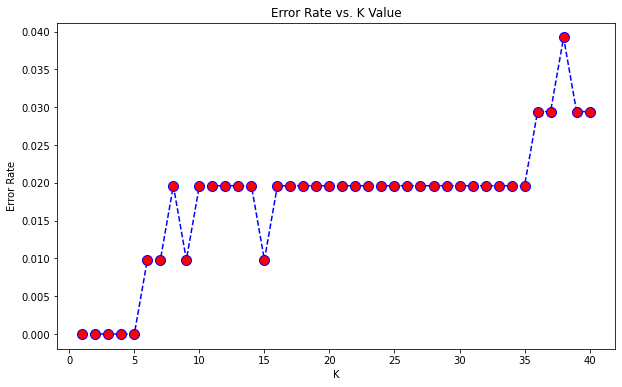

In [69]:
'''
We will create predictions to K=1 until K=40, and we will compare the Errors for each prediction.
In the final, this will create a 'List of Errors'.
'''

error_rate = []

# Will take some time
for i in range(1,41):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    
# Now, let's plot this Errors:
plt.figure(figsize=(10,6))
plt.plot(range(1,41), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')